In [1]:
import src.utilidade as utilidade, src.zip as zip, src.video as video
import os

# Virial 6.3: Choques elásticos com a mesma densidade

Fiz várias simulações com a mesma densidade para ver se é possível encontrar alguma estatística.

In [4]:
alvo = 'virial6.3'
destino = 'data/' + alvo
diretorio = destino + "/data"
zip.baixar_zip(f"https://www.ime.usp.br/~oapotalej/{alvo}.zip", f'{destino}.zip')
zip.descompactar(f'{destino}.zip', destino)
os.remove(destino + '.zip')

Arquivo salvo com data/virial6.3.zip
Extraído!


In [5]:
# Primeiro, vamos ler os arquivos
arquivos_antes = utilidade.ler_pastas_diretorio(diretorio)
densidades = list(arquivos_antes.keys())
densidades.sort()
arquivos = {dens: arquivos_antes[dens] for dens in densidades}

# Agora vamos calcular as informacoes das simulacoes
for densidade in arquivos:
    arquivo = arquivos[densidade]
    infos = utilidade.infos_simulacao(arquivo['pasta'])
    arquivo['infos'] = infos

Lendo a pasta 'data/virial6.3/data/20250823_003'... lido! (1.91s) informacoes calculadas! (4.84s)
Lendo a pasta 'data/virial6.3/data/20250823_002'... lido! (1.47s) informacoes calculadas! (4.81s)
Lendo a pasta 'data/virial6.3/data/20250822_001'... lido! (1.43s) informacoes calculadas! (4.78s)
Lendo a pasta 'data/virial6.3/data/20250822_002'... lido! (1.46s) informacoes calculadas! (4.74s)
Lendo a pasta 'data/virial6.3/data/20250823_001'... lido! (1.48s) informacoes calculadas! (4.79s)


Com os dados em mãos, vamos ver o comportamento da segunda derivada do momento de inércia. Por experimentos anteriores, o esperado é que fique abaixo de zero mas pareça convergir para algo constante.

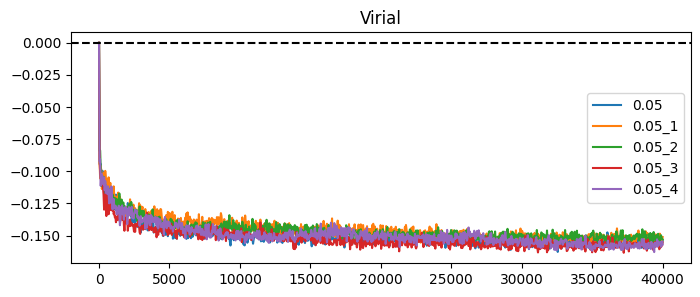

In [6]:
utilidade.fazer_figura(arquivos, 'virial', 'Virial', y_referencia=[0])